In [1]:
# We will be exploring classification algorithms using data related to credit default in Taiwan.

##############
# DATA SET 1
# https://github.com/coderschool/courses_content/raw/coderschool/intro_to_machine_learning/files/notebooks/data/grades.csv

##############
# DATA SET 2
# The data set may be easily downloaded here:
# https://github.com/coderschool/courses_content/raw/coderschool/intro_to_machine_learning/files/notebooks/data/credit_cards.csv

# The original source and data description may be found here:
# https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
##############

import numpy as np
import pandas as pd
import sklearn as skl
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sea

# control the plotsize
plt.rcParams['figure.figsize'] = [10,5]

In [4]:
raw = pd.read_csv('grades.csv')
raw.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [7]:
raw.describe().T

,count,mean,std,min,25%,50%,75%,max
admit,400.0,0.3175,0.466087,0.00,0.00,0.000,1.00,1.0
gre,400.0,587.7000,115.516536,220.00,520.00,580.000,660.00,800.0
gpa,400.0,3.3899,0.380567,2.26,3.13,3.395,3.67,4.0
rank,400.0,2.4850,0.944460,1.00,2.00,2.000,3.00,4.0


In [8]:
raw.shape

(400, 4)

In [9]:
raw.rename(columns={'rank':'standing'}, inplace=True)

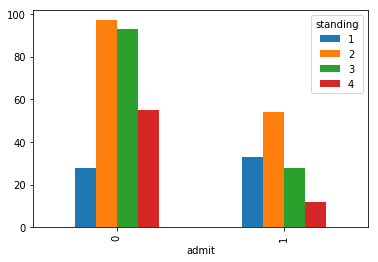

In [11]:
pd.crosstab(raw['admit'], raw['standing']).plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee50c9ee80>,
      dtype=object)

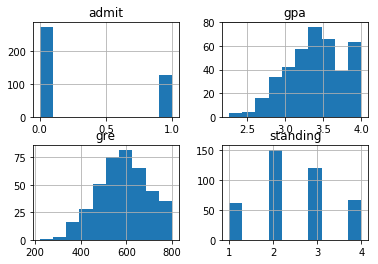

In [13]:
raw.hist()

In [18]:
dummy_standing = pd.get_dummies(raw.loc[:,'standing'], prefix='standing')
# data = pd.concat([raw[['admit', 'gpa', 'gre']], dummy_standing], axis=1)
data = raw[['admit', 'gpa', 'gre']].join(dummy_standing.loc[:, 'standing_1':])
data.head()

,admit,gpa,gre,standing_1,standing_2,standing_3,standing_4
0,0,3.61,380,0,0,1,0
1,1,3.67,660,0,0,1,0
2,1,4.00,800,1,0,0,0
3,1,3.19,640,0,0,0,1
4,0,2.93,520,0,0,0,1


In [21]:
y = data['admit']
X = data.drop('admit', axis=1)
X.head()

,gpa,gre,standing_1,standing_2,standing_3,standing_4
0,3.61,380,0,0,1,0
1,3.67,660,0,0,1,0
2,4.00,800,1,0,0,0
3,3.19,640,0,0,0,1
4,2.93,520,0,0,0,1


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [26]:
# from sklearn.linear_model import LinearRegression
from statsmodels.api import Logit
logit = Logit(y_train, X_train)

In [29]:
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.571367
         Iterations 6


In [30]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  320
Model:                          Logit   Df Residuals:                      314
Method:                           MLE   Df Model:                            5
Date:                Tue, 24 Jul 2018   Pseudo R-squ.:                 0.08716
Time:                        19:54:01   Log-Likelihood:                -182.84
converged:                       True   LL-Null:                       -200.30
                                        LLR p-value:                 1.564e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gpa            0.8518      0.368      2.312      0.021       0.130       1.574
gre            0.0018      0.001      1.456      0.145      -0.001       0.004
standing_1    -3.8089      1.277     -2.983      0.003      -6.312      -1.306
standing_2    -4.5116      1.243     -3.628      0.000      -6.949      -2.075
standing_3    -5.2395      1.301     -4.028      0.000      -7.789      -2.690
standing_4    -5.6170      1.284     -4.376      0.000      -8.133      -3.101
==============================================================================
"""

In [31]:
result.conf_int()

,0,1
gpa,0.129637,1.574057
gre,-0.000619,0.004194
standing_1,-6.311891,-1.305976
standing_2,-6.948715,-2.074520
standing_3,-7.788679,-2.690227
standing_4,-8.132837,-3.101140


In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
y_pred = logreg.predict(X_test)

In [36]:
print("Accuracy: {:.2f}".format(logreg.score(X_test, y_test)))

Accuracy: 0.70


In [40]:
# Cross validation
from sklearn.model_selection import cross_val_score
kfold = skl.model_selection.KFold(n_splits=10, random_state=7)

In [43]:
m = LogisticRegression()
results = cross_val_score(m, X_train, y_train, cv=kfold, scoring='accuracy')
results

array([0.6875 , 0.75   , 0.6875 , 0.75   , 0.78125, 0.65625, 0.6875 ,
       0.6875 , 0.53125, 0.78125])

Text(0,0.5,'True positive rate')

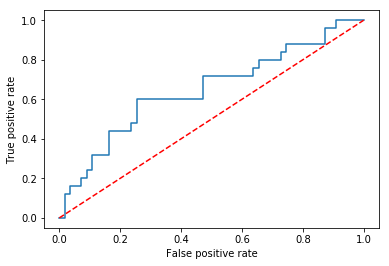

In [61]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='abc')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')